## Exploratory Data Analysis (EDA)

   1. Explore feautures or characteristics to predict price of car
   2. Analyze patterns and run descriptive statistical analysis
   3. Group data based on identified parameters and create pivot tables
   4. Identify the effect of independent attributes on price of cars

In [3]:
! pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn


import pandas as pd
import numpy as np
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [8]:
df = pd.read_csv('clean_df.csv')

In [9]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


## Analysing Individual Feature Patterns Using Visualization

Import visualization packages like 'matplotlib' and 'seaborn'. Don't forget about '%matplotlib inline' to plot in a jupyter notebook

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what "type" of variable we are dealing with. This will help us find the right visualization method for that variable

In [13]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                  bool
gas                     bool
std                     bool
turbo                   bool
dtype: object

In [14]:
#data type of the column peak-rpm
df['peak-rpm'].dtypes

dtype('float64')

Correlation Example - Let's calculate the correlation between variables of type 'int64' and 'flot64' using the method 'corr'

In [15]:
#select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022505,-0.195662,0.027956,-0.078346,-0.118214,-0.099157
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610


In [16]:
#Correlation between columns - 'bore', 'stroke', 'compression-ratio', and horsepower'
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


### Continuous Numerical Variables

Continuous numerical variables are variables that may contain any value within some range. They can be of type 'int64' and 'float64'. A great way to visualize these variables is by using "scatterplots" with fitted lines. 

For understanding the relationship (linear) between an individual variable and the price, we can use "regplot" which plots the scatterplot plus fitted regression line for the data. This will be helpful later for better visualizing the fit of the sample linear regression model as well.

#### Positive linear relationship

let's find the scatterplot of "engine-size" and "price"

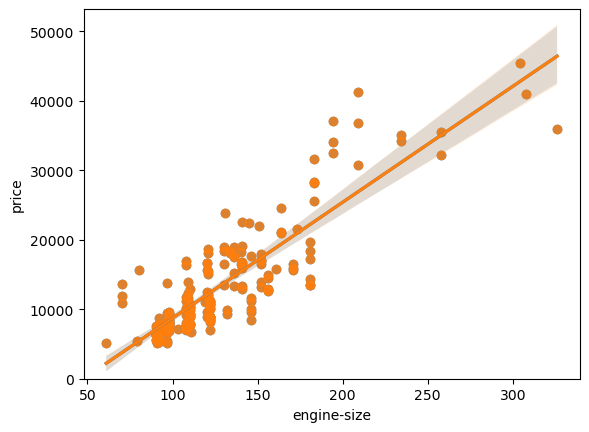

In [18]:
#engine size as potential variable of price
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)
plt.show()

As the engine size increases, price also increased, it's direct correlation between engine size and price. Engine size seems to be good predictor of price since the reggresion line almost a perfect diagonal line

In [19]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


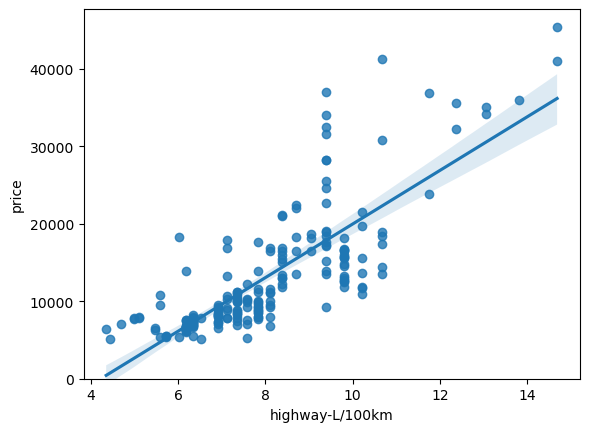

In [21]:
#scatter plot fro variable highway mpg and price 
sns.regplot( x = 'highway-L/100km', y= 'price', data =df)
plt.ylim(0,)
plt.show()

In [24]:
#create a column in df for 'highway-mpg'
df['highway-mpg'] = 235/df['highway-L/100km']

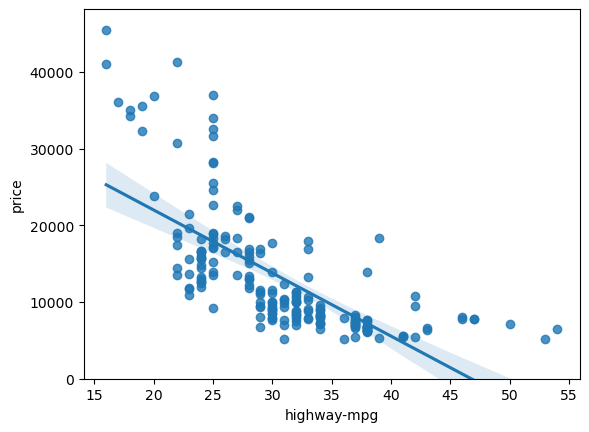

In [25]:
sns.regplot( x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)
plt.show()

As highway-mpg goes up, the price goes down, this indicates an inverse/negative relation ship between these two variables. Highway mpg could potentially be a predictor of price.

In [26]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [27]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


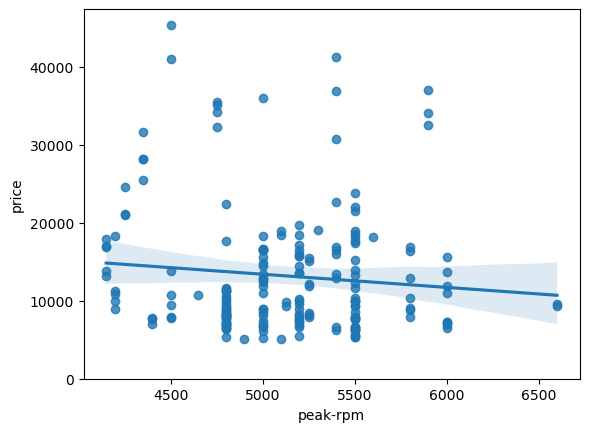

In [28]:
### Weak linear relationship
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0,)
plt.show()

In [29]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Peak-rpm does not seem like a good predictor of the price at all, since the reggression line is close to horrizontal and the correlation value is close to 0 but not close to 1 0r -1. Also, the dat points are very scattered and far from the fitted line, showing lots of variability. So, it's not a reliable variable.

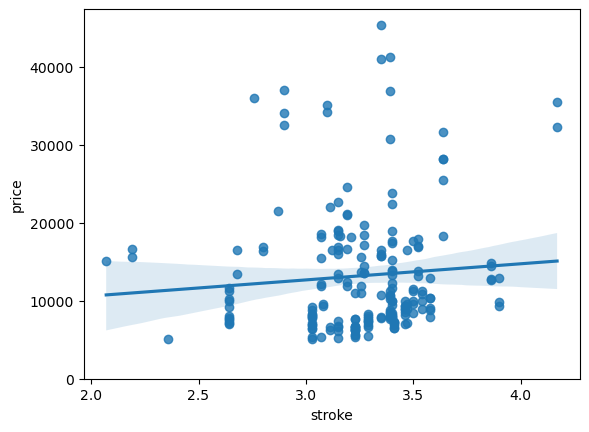

In [30]:
#correlation between stroke and price
sns.regplot(x = 'stroke', y = 'price', data = df)
plt.ylim(0,)
plt.show()

In [31]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


very weak relation between two variables.

#### Categorical Variables

These are the variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. These variables can have the type 'object' or 'int64'. A good way to visualize categorical variables is by using boxplots.


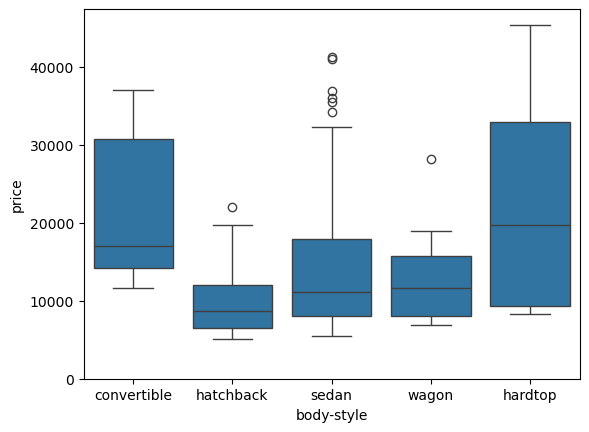

In [33]:
#corelation between body style and price 
sns.boxplot(x = 'body-style', y = 'price', data = df)
plt.ylim(0,)
plt.show()

We can see that the distribution of price between body-style categories have a significant overlap, so-body style would not be a good predictor of price. let's examine engine 'engine-location' and 'price'.

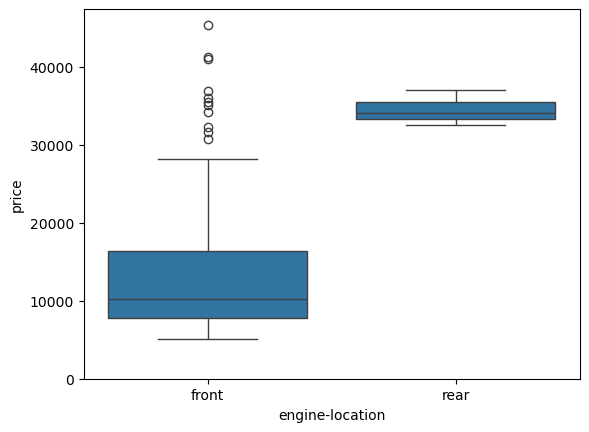

In [34]:
#relation for 'engine-location' and 'price'
sns.boxplot(x = 'engine-location', y = 'price', data = df)
plt.ylim(0,)
plt.show()

From the graph we can see that the distribution of price between 'engine-location' and 'price' are distinct enough to take 'engine-location' as a potential good predictor of price.

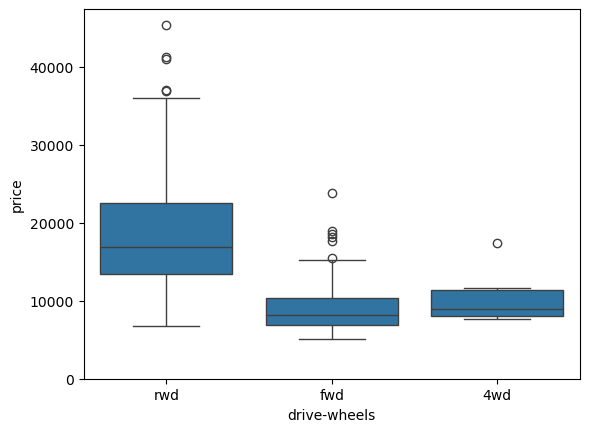

In [36]:
#relation for 'drive-wheels' and price
sns.boxplot(x ='drive-wheels', y = 'price', data = df)
plt.ylim(0,)
plt.show()

Price category differs for this variable, so drive-wheels could potentially be a predictor of price

### Descriptive Statistical Analysis

The "describe" function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in this statistics.

In [38]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,hifgway-mpg,highway-mpg
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,30.686567,30.686567
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,6.815150,6.815150
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,16.000000,16.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,25.000000,25.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,30.000000,30.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,34.000000,34.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,54.000000,54.000000


In [39]:
#The default setting of "describe" skips variables of type 'object'. We can apply the method "describe" on the variables of type 'object'
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


### Value Counts

Value countsb is a good way of understanding how may units of each characteristic/variable we have. We can apply "value_counts" method on the column 'drive-wheels'. The method 'value_counts' only works on pandas series, not on pandas dataframes. So, we only include on bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [40]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [41]:
#conert series to data frame
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Let's repaeat the above steps but save thje results to dataframe 'drive_wheels_count' and rename the column from drive-wheels to value_counts.

In [44]:
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()
drive_wheels_count.reset_index(inplace = True)
drive_wheels_count = drive_wheels_count.rename(columns = {'index': 'drive-wheels', 'drive-wheels': 'value_counts'})
drive_wheels_count

,value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


In [45]:
#rename the index to drive-wheels
drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count

,value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


In [48]:
#let's try the same process for the 'engine-location' column
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts = engine_loc_counts.rename(columns = {'index': 'engine-location', 'engine-location': 'value_counts'})
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,count
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a goof preictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusion about the engine location.

### Bascis of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [49]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know on average which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style', and 'price', then assign it to then variable "df_group_one".

In [50]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [52]:
#We can now calculate the average price of the different categories of data.
# grouping_results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index = False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vechicles are, on average, the most expensive, while 4 - wheel and front wheel are approximately the same in price.

We can also group by multiple variables. For example, let's group by both'drive-wheels', and 'body-style'. This groups the dataframe by unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [53]:
# grouping results
df_gtest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gtest.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much eaiser to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along column and another along the row. We can convert the dataframe to a pivot table using the method 'pivot' to create a pivot table from the groups.

In this case, we will leave the drive - wheels varable as the row of the table, and pivot body-style as the column of the table.

In [54]:
grouped_pivot = grouped_test1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

 Often, we won't have data for some of the pivot cells. We can fill these missing cells withthe value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [56]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [58]:
# groupby function to find the average 'price' of each car based on 'body-style'
df_gtest2 = df[['body-style', 'price']]
grouped_test_bodystyle = df_gtest2.groupby(['body-style'],as_index = False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### Variables: Drive Wheels and Body Style vs Price

Let's use a heat map to visualize the relationship between Body Style vs Price.

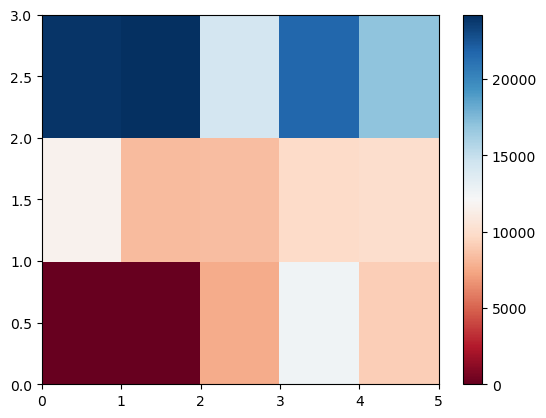

In [59]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to clour with respect to the variables 'drive-wheels' and 'body-style' on the vertical and horizontal axis, respectively. THis allows us to visualize how the price is related to 'drive-wheels' and 'body-style'.

The default labels convey no useful information, let's fix that:

In [61]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap = 'RbBu')

#Label names
row_labels = grouped_ivot.columns.level[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arrange(grouped_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arrange(grouped_pivot.shape[0]) +  0.5, minor = False)

#insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

# rotate label if too long
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()

ValueError: 'RbBu' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Visualization is very important in data science, for moe the question is what are the main characteristics which ahve the most impact on the car price?

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?

### Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

Difference between Correlation and Causation - Correlation does not imply causation. Determining correlation is much simpler than determining causation, as causation may require independent experimentation. 

### Pearson correlation

The pearson correlation measures the linear dependence between two varaibles X and Y.

The resulting cooefffiecent is a value between -1 and 1 inclusive, where:

   1. '1' - Perfect positive linear correlation.
   2. '0' - No linear correlation, the two varriables most likely do not affect each other
   3. '-1' - Perfect negative linear correlation

Pearson correlation is the default method of the function 'corr'. Like before, we can calculate the pearson correlation of the 'int64' or 'flot64' variables.

In [62]:
df.select_dtypes(include =['number']).corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,hifgway-mpg,highway-mpg
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022505,-0.195662,0.027956,-0.078346,-0.118214,-0.099157,0.020344,0.020344
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,0.036233,0.036233
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.181877,-0.181877
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,-0.543304,-0.543304
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,-0.698142,-0.698142
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,-0.680635,-0.680635
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,-0.104812,-0.104812
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,-0.794889,-0.794889
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,-0.679571,-0.679571
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,-0.591309,-0.591309


### P- Value

What is P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we're 95% confident that the correlation between variables is significant. 

   1. p-value < 0.001 - means there is a strong evidence that the correlation is significant
   2. p-value < 0.05 - means there is moderate evidence that the correlation is significant
   3. p-value < 0.1 - means there is weak evidence that the correlation is significant
   4. p-value > 0.1 - means there is no evidence that the correlation is significant

We can obtain this information using 'stats' module in the 'scipy' library.

In [63]:
from scipy import stats

Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'city-mpg', 'highway-mpg', vs 'price'

In [64]:
#pearson correlation cofficient and p-value of 'wheel-base' vs 'price'
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('The pearson Correlation Coefficient is', pearson_coef, 'witha P-value of P =', p_value)

The pearson Correlation Coefficient is -0.7046922650589529 witha P-value of P = 1.7495471144476463e-31


Conclusion - Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

In [66]:
#pearson correlation cooeficient and p-value of 'horsepower' and 'price'
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('The pearson correlation coefficient is', pearson_coef, 'with P-value of P =', p_value)

The pearson correlation coefficient is 0.8096068016571054 with P-value of P = 6.273536270650351e-48


In [68]:
#pearson correlation coeffiecnt of 'length' 'width', 'curb-weight', 'engine-size', 'bore', 'city-mpg', 'highway-mpg', vs 'price'
pearson_coef, p_value = stats.pearsonr(df['length'],df['price'])
print('The pearson correlation coefficient of length is', pearson_coef, 'with P-value of P =', p_value)

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('The pearson correlation coefficient of width is', pearson_coef, 'with P-value of P =', p_value)

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('The pearson correlation coefficient of curb-weigth is', pearson_coef, 'with P-value of P =', p_value)

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('The pearson correlation coefficient of engine-size is', pearson_coef, 'with P-value of P =', p_value)

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('The pearson correlation coefficient bore is', pearson_coef, 'with P-value of P =', p_value)

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('The pearson correlation coefficient city-mpg is', pearson_coef, 'with P-value of P =', p_value)

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('The pearson correlation coefficient of highway-mpg is', pearson_coef, 'with P-value of P =', p_value)


The pearson correlation coefficient of length is 0.690628380448364 with P-value of P = 8.016477466158868e-30
The pearson correlation coefficient of width is 0.7512653440522674 with P-value of P = 9.20033551048144e-38
The pearson correlation coefficient of curb-weigth is 0.8344145257702846 with P-value of P = 2.1895772388937294e-53
The pearson correlation coefficient of engine-size is 0.8723351674455185 with P-value of P = 9.265491622198793e-64
The pearson correlation coefficient bore is 0.5431553832626602 with P-value of P = 8.049189483935315e-17
The pearson correlation coefficient city-mpg is -0.6865710067844677 with P-value of P = 2.3211320655676474e-29
The pearson correlation coefficient of highway-mpg is -0.7046922650589529 with P-value of P = 1.7495471144476463e-31


### Conclusion - Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continous Numerical Variables:
  1. Length
  2. Width
  3. Curb-weight
  4. Horsepower
  5. City-mpg
  6. Highway-mpg
  7. wheel-base
  8. bore

Categorical Variables:
  1. Drive-wheels

As we move into building ML models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.